<a href="https://colab.research.google.com/github/donghui-0126/machine-learning/blob/main/dacon/%EA%B1%B4%EC%84%A4%EA%B8%B0%EA%B3%84_%EC%98%A4%EC%9D%BC_%EC%83%81%ED%83%9C_%EB%B6%84%EB%A5%98_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import pandas as pd
import numpy as np
import os


# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_og = pd.read_csv("/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/train.csv")
test = pd.read_csv("/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/test.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/건설기계 오일 상태 분류 AI 경진대회/sample_submission.csv")
train = train_og.drop(["ID"], axis=1)

## 데이터 정보, 시각화

In [ ]:
train.head(3)

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,COMPONENT3,1486,2011,7,200,0,3,93,0,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,COMPONENT2,1350,2021,51,375,0,2,19,0,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,COMPONENT2,2415,2015,2,200,0,110,1,1,0,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1


In [ ]:
train.describe(include="all")

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
count,14095,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,...,2316.000000,2316.000000,2118.000000,2118.000000,2118.000000,14095.000000,3724.000000,14095.000000,14095.000000,14095.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,COMPONENT3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3146.082937,2013.652501,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,0.006314,...,29.870898,56.063472,239.938149,5488.693107,19415.597262,0.050656,13.576230,109.355815,588.646825,0.085349
std,NaN,4216.089809,3.964758,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,0.152189,...,97.459625,184.332678,685.053457,15474.146283,40145.311444,0.475438,1.073718,49.612379,531.743393,0.279411
min,NaN,1000.000000,2007.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,154.000000,0.000000,5.200000,2.900000,0.000000,0.000000
25%,NaN,1655.000000,2010.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,3.000000,5.000000,22.000000,636.750000,5409.250000,0.000000,12.900000,71.800000,37.000000,0.000000
50%,NaN,2227.000000,2014.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.000000,...,7.000000,13.000000,57.000000,1753.000000,12691.500000,0.000000,13.500000,111.300000,520.000000,0.000000
75%,NaN,3797.000000,2017.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,0.000000,...,23.000000,39.250000,189.000000,5517.750000,24535.750000,0.000000,14.200000,137.200000,1119.000000,0.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COMPONENT_ARBITRARY  14095 non-null  object 
 1   ANONYMOUS_1          14095 non-null  int64  
 2   YEAR                 14095 non-null  int64  
 3   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 4   ANONYMOUS_2          14095 non-null  int64  
 5   AG                   14095 non-null  int64  
 6   AL                   14095 non-null  int64  
 7   B                    14095 non-null  int64  
 8   BA                   14095 non-null  int64  
 9   BE                   14095 non-null  int64  
 10  CA                   14095 non-null  int64  
 11  CD                   12701 non-null  float64
 12  CO                   14095 non-null  int64  
 13  CR                   14095 non-null  int64  
 14  CU                   14095 non-null  int64  
 15  FH2O                 3890 non-null  

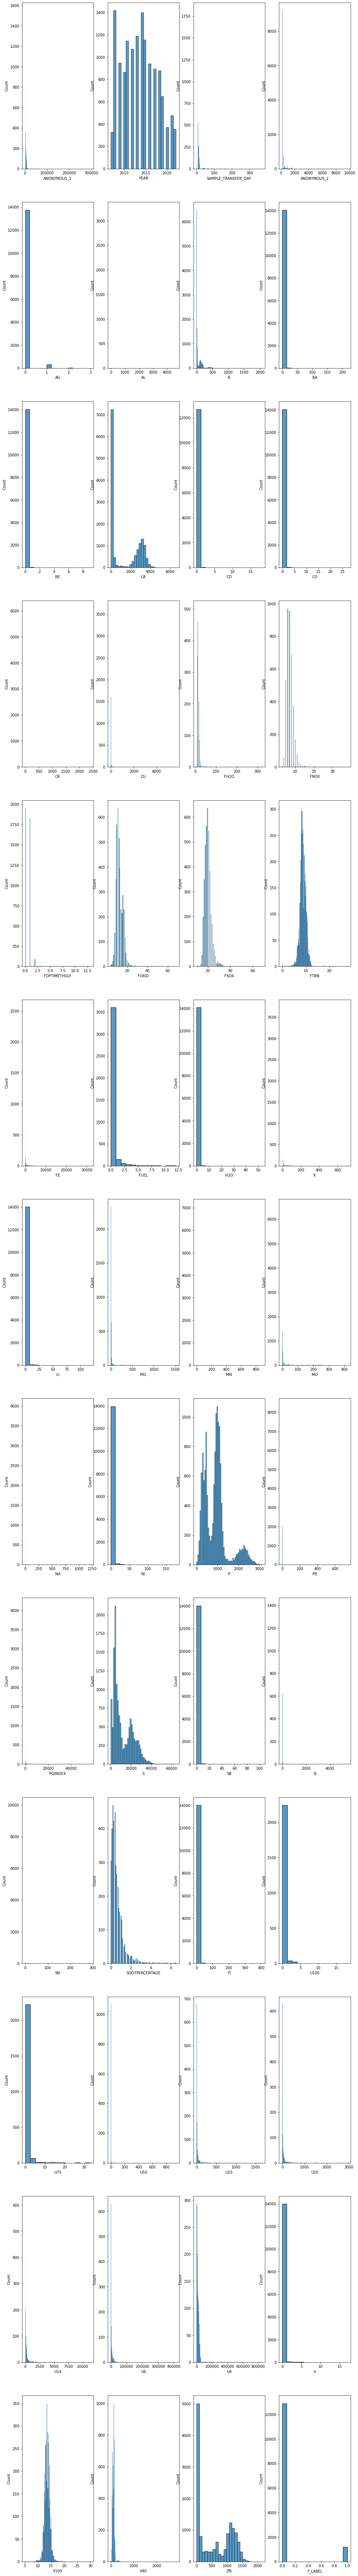

In [ ]:
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()

def show_plot(df, columns):
    fig, axs = plt.subplots(nrows=13, ncols=4, figsize=(16,128))
    for i, column in enumerate(columns):
        row = int(i/4)
        col = i%4
    
        sns.histplot(df[column], ax=axs[row][col])

show_plot(train, numerical_columns)

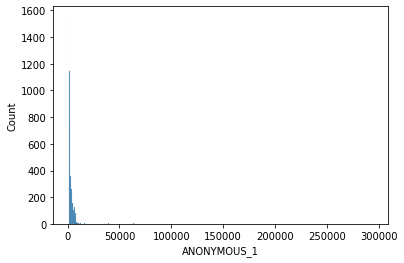

In [ ]:
fig = plt.plot(figsize=(4,8))

sns.histplot(train["ANONYMOUS_1"])

## 데이터 전처리

In [4]:
train.isnull().sum()[train.isnull().sum()>10000].index

Index(['FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FUEL',
       'SOOTPERCENTAGE', 'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4',
       'V100'],
      dtype='object')

In [5]:
train = train.drop(train.isnull().sum()[train.isnull().sum()>10000].index, axis=1)
train = train.drop(["YEAR"], axis=1)

In [6]:
train.describe()

,ANONYMOUS_1,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,...,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,12701.000000,...,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000
mean,3146.082937,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,0.006314,1366.757574,0.015589,...,415.159631,12029.318624,0.476978,35.058248,0.909826,0.707911,0.050656,109.355815,588.646825,0.085349
std,4216.089809,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,0.152189,1481.924727,0.209407,...,1528.191012,9325.610196,2.729936,195.329029,3.604276,6.897579,0.475438,49.612379,531.743393,0.279411
min,1000.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000
25%,1655.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.000000,48.000000,0.000000,...,12.000000,4440.500000,0.000000,3.000000,0.000000,0.000000,0.000000,71.800000,37.000000,0.000000
50%,2227.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.000000,198.000000,0.000000,...,29.000000,8034.000000,0.000000,6.000000,0.000000,0.000000,0.000000,111.300000,520.000000,0.000000
75%,3797.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,0.000000,2975.000000,0.000000,...,181.000000,19750.000000,0.000000,12.000000,1.000000,0.000000,0.000000,137.200000,1119.000000,0.000000
max,294451.000000,368.000000,9650.000000,3.000000,4630.000000,2051.000000,216.000000,9.000000,6609.000000,18.000000,...,56761.000000,64160.000000,103.000000,5459.000000,289.000000,403.000000,17.000000,2840.500000,2132.000000,1.000000


In [7]:
train = pd.get_dummies(train, columns = ['COMPONENT_ARBITRARY'])
train.head(4)

,ANONYMOUS_1,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,...,SN,TI,V,V40,ZN,Y_LABEL,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,1486,7,200,0,3,93,0,0,3059,0.0,...,2,5,0,154.0,75,0,0,0,1,0
1,1350,51,375,0,2,19,0,0,2978,0.0,...,0,0,0,44.0,652,0,0,1,0,0
2,2415,2,200,0,110,1,1,0,17,0.0,...,1,0,0,72.6,412,1,0,1,0,0
3,7389,2,200,0,8,3,0,0,1960,0.0,...,1,0,0,133.3,7,0,0,0,1,0


In [8]:
# 이상치 제거
# 이상치 = Q3 + threshold * IQR 
# 이상치가 너무 많음

'''
threshold를 기준으로 하니까 너무 데이터가 많이 삭제됨. 그래서 고정적으로 n개를 삭제하는 함수를 만들기로 결정함 
'''

# def drop_outlier(df, threshold=1.5):
#     print(df.shape)
#     describe = df.describe()
#     cols = df.columns[0, 2,]
#     for col in df.columns[:-4]:
#         IQR = describe.loc["75%",col] - describe.loc["25%", col]
#         outlier = describe.loc["75%",col] + IQR * threshold
#         outlier_data = df[df[col]>outlier].index
#         print("{}에서의 outlier 데이터 개수: {}".format(col, len(outlier_data)))
#         df = df.drop(df[df[col]>outlier].index, axis=0)
#     print(df.shape)
#     return df

'\nthreshold를 기준으로 하니까 너무 데이터가 많이 삭제됨. 그래서 고정적으로 n개를 삭제하는 함수를 만들기로 결정함 \n'

In [9]:
def drop_outlier(df, n=50):
    print("원래 데이터 크기: ",df.shape)
    outlier = pd.DataFrame()
    # 원핫 인코딩 된 컬럼은 이상치 제거 하지 않음.
    for col in df.columns[:-4]:
        top_n = df.sort_values(by=col, ascending=False)[:n]
        outlier = outlier.append(top_n)
        top_n = top_n.index
        df = df.drop(top_n, axis=0)
    print("이상치 제거 후 데이터 크기: ",df.shape)
    return  outlier, df
outlier, train = drop_outlier(train) 

원래 데이터 크기:  (14095, 38)
이상치 제거 후 데이터 크기:  (12395, 38)


In [10]:
train_X = train.drop(["Y_LABEL"], axis=1)
train_y = train.Y_LABEL

In [11]:
train_X

,ANONYMOUS_1,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,...,SI,SN,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,1486,7,200,0,3,93,0,0,3059,0.0,...,427,2,5,0,154.0,75,0,0,1,0
1,1350,51,375,0,2,19,0,0,2978,0.0,...,0,0,0,0,44.0,652,0,1,0,0
2,2415,2,200,0,110,1,1,0,17,0.0,...,0,1,0,0,72.6,412,0,1,0,0
3,7389,2,200,0,8,3,0,0,1960,0.0,...,1,1,0,0,133.3,7,0,0,1,0
4,3954,4,200,0,1,157,0,0,71,0.0,...,2,0,0,0,133.1,128,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,1616,8,200,0,2,201,1,0,6,0.0,...,2,0,0,0,135.4,16,0,0,1,0
14091,2784,2,200,0,3,85,0,0,2945,0.0,...,5,0,0,0,117.5,1408,1,0,0,0
14092,1788,9,550,0,6,0,1,0,13,0.0,...,18,0,0,0,54.0,1301,0,0,1,0
14093,2498,19,550,0,2,4,0,0,2244,NaN,...,0,0,0,0,44.3,652,0,1,0,0


In [12]:
outlier

,ANONYMOUS_1,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,...,SN,TI,V,V40,ZN,Y_LABEL,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
5970,294451,5,200,0,9,133,0,0,3264,0.0,...,0,0,0,141.3,16,0,0,0,1,0
13469,123788,0,6654,0,13,1,0,0,18,0.0,...,0,0,0,124.3,74,0,0,0,1,0
3876,89350,7,200,0,1,11,0,0,61,0.0,...,0,0,0,140.0,58,0,0,0,1,0
8511,78418,26,200,0,0,2,0,0,9,0.0,...,0,0,0,59.1,372,0,0,1,0,0
212,78418,26,200,0,0,0,0,0,48,0.0,...,0,0,0,134.0,35,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,1240,63,375,0,0,1,5,0,28,NaN,...,1,0,0,139.7,20,1,0,0,1,0
8843,6877,21,200,0,3,4,1,0,2225,0.0,...,0,0,0,155.9,22,1,0,0,1,0
8769,8021,6,571,0,122,0,1,0,102,0.0,...,0,0,0,133.0,53,1,0,0,1,0
5782,1714,8,200,0,1,17,0,0,83,0.0,...,0,0,0,131.7,1051,1,1,0,0,0


In [13]:
train_X.describe()

,ANONYMOUS_1,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,...,SI,SN,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
count,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.0,12395.000000,11213.000000,...,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000,12395.000000
mean,2965.148286,7.183138,363.950061,0.019282,8.065107,62.132957,0.560065,0.0,1353.281000,0.007759,...,15.011940,0.710206,0.158290,0.014038,106.484407,593.640742,0.282049,0.177572,0.480436,0.059944
std,1954.456344,7.938841,375.457643,0.137520,36.148501,97.127203,1.348444,0.0,1471.092276,0.087746,...,40.619813,1.830326,0.783145,0.117652,39.379666,524.719060,0.450015,0.382167,0.499637,0.237392
min,1000.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1653.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.0,47.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,70.600000,38.000000,0.000000,0.000000,0.000000,0.000000
50%,2212.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.0,191.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,109.300000,559.000000,0.000000,0.000000,0.000000,0.000000
75%,3772.000000,8.000000,406.000000,0.000000,4.000000,109.000000,0.000000,0.0,2965.000000,0.000000,...,11.000000,1.000000,0.000000,0.000000,135.900000,1116.500000,1.000000,0.000000,1.000000,0.000000
max,15000.000000,91.000000,5100.000000,1.000000,600.000000,503.000000,11.000000,0.0,4164.000000,1.000000,...,574.000000,16.000000,11.000000,1.000000,303.300000,1551.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# 원핫인코딩된 컬럼을 제외하고 표준화 함(이상치 데이터는 정규화 하지 않는다).
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
standardized_train_X = pd.DataFrame(scaler.fit_transform(train_X.iloc[:, :-4]), columns = train_X.columns[:-4])


change_index = {}
for x, y in zip(standardized_train_X.index, train_X.index):
    change_index[x] = y

standardized_train_X = standardized_train_X.rename(change_index)
standardized_train_X = pd.concat([standardized_train_X, train_X.iloc[:, -4:]], axis=1)
standardized_train_X

,ANONYMOUS_1,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,...,SI,SN,TI,V,V40,ZN,COMPONENT_ARBITRARY_COMPONENT1,COMPONENT_ARBITRARY_COMPONENT2,COMPONENT_ARBITRARY_COMPONENT3,COMPONENT_ARBITRARY_COMPONENT4
0,-0.756839,-0.023070,-0.436685,-0.140218,-0.140125,0.317813,-0.415358,0.0,1.159538,-0.088428,...,10.142949,0.704708,6.182644,-0.119322,1.206651,-0.988456,0,0,1,0
1,-0.826426,5.519525,0.029432,-0.140218,-0.167790,-0.444105,-0.415358,0.0,1.104475,-0.088428,...,-0.369587,-0.388037,-0.202129,-0.119322,-1.586782,0.111224,0,1,0,0
2,-0.281495,-0.652910,-0.436685,-0.140218,2.820006,-0.629437,0.326267,0.0,-0.908396,-0.088428,...,-0.369587,0.158336,-0.202129,-0.119322,-0.860489,-0.346182,0,1,0,0
3,2.263560,-0.652910,-0.436685,-0.140218,-0.001801,-0.608844,-0.415358,0.0,0.412444,-0.088428,...,-0.344967,0.158336,-0.202129,-0.119322,0.680978,-1.118054,0,0,1,0
4,0.505968,-0.400974,-0.436685,-0.140218,-0.195455,0.976769,-0.415358,0.0,-0.871687,-0.088428,...,-0.320348,-0.388037,-0.202129,-0.119322,0.675899,-0.887445,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,-0.690321,0.102898,-0.436685,-0.140218,-0.167790,1.429802,0.326267,0.0,-0.915874,-0.088428,...,-0.320348,-0.388037,-0.202129,-0.119322,0.734307,-1.100902,0,0,1,0
14091,-0.092688,-0.652910,-0.436685,-0.140218,-0.140125,0.235443,-0.415358,0.0,1.082042,-0.088428,...,-0.246489,-0.388037,-0.202129,-0.119322,0.279739,1.552054,1,0,0,0
14092,-0.602314,0.228867,0.495548,-0.140218,-0.057131,-0.639733,0.326267,0.0,-0.911116,-0.088428,...,0.073565,-0.388037,-0.202129,-0.119322,-1.332833,1.348127,0,0,1,0
14093,-0.239027,1.488547,0.495548,-0.140218,-0.167790,-0.598548,-0.415358,0.0,0.605506,NaN,...,-0.369587,-0.388037,-0.202129,-0.119322,-1.579163,0.111224,0,1,0,0


In [15]:
standardized_train_X.isnull().sum()

ANONYMOUS_1                          0
SAMPLE_TRANSFER_DAY                  0
ANONYMOUS_2                          0
AG                                   0
AL                                   0
B                                    0
BA                                   0
BE                                   0
CA                                   0
CD                                1182
CO                                   0
CR                                   0
CU                                   0
FE                                   0
H2O                                  0
K                                 1941
LI                                   0
MG                                   0
MN                                   0
MO                                   0
NA                                   0
NI                                   0
P                                    0
PB                                   0
PQINDEX                              0
S                        

In [16]:
# nan 채우기. 뒤에 값으로 채워준다.
tf.random.set_seed(42)
np.random.seed(42)

standardized_train_X = standardized_train_X.fillna(method='bfill')
standardized_train_X.isnull().any()

ANONYMOUS_1                       False
SAMPLE_TRANSFER_DAY               False
ANONYMOUS_2                       False
AG                                False
AL                                False
B                                 False
BA                                False
BE                                False
CA                                False
CD                                False
CO                                False
CR                                False
CU                                False
FE                                False
H2O                               False
K                                 False
LI                                False
MG                                False
MN                                False
MO                                False
NA                                False
NI                                False
P                                 False
PB                                False
PQINDEX                           False


## 모델
1. 각 컬럼의 상위 n개의 이상치만 추려서 삭제. 그리고 모델을 훈련한다.
2. 각 컬럼의 상위 n개의 이상치만 추려서 이상치 데이터를 따로 생성함. 그 다음 이상치 데이터를 wide연결하고 이상치를 제거한 데이터는 deep연결을 하는 모델
3. 이상치 데이터를 제거하지 않고 모델을 훈련한다. 


In [17]:
tf.random.set_seed(42)
np.random.seed(42)

# 모델 1 훈련
model_1 = keras.models.Sequential([
    keras.layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation="sigmoid")
])

In [18]:
model_1.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
model_1.fit(standardized_train_X, train_y, epochs=20)

Epoch 1/20
388/388 [==============================] - 5s 4ms/step - loss: 0.7186 - accuracy: 0.6537
Epoch 2/20
388/388 [==============================] - 2s 4ms/step - loss: 0.5518 - accuracy: 0.7651
Epoch 3/20
388/388 [==============================] - 2s 4ms/step - loss: 0.4525 - accuracy: 0.8386
Epoch 4/20
388/388 [==============================] - 2s 4ms/step - loss: 0.3841 - accuracy: 0.8780
Epoch 5/20
388/388 [==============================] - 2s 4ms/step - loss: 0.3416 - accuracy: 0.9018
Epoch 6/20
388/388 [==============================] - 2s 4ms/step - loss: 0.3120 - accuracy: 0.9118
Epoch 7/20
388/388 [==============================] - 2s 4ms/step - loss: 0.2890 - accuracy: 0.9226
Epoch 8/20
388/388 [==============================] - 2s 4ms/step - loss: 0.2724 - accuracy: 0.9259
Epoch 9/20
388/388 [==============================] - 2s 4ms/step - loss: 0.2610 - accuracy: 0.9292
Epoch 10/20
388/388 [==============================] - 2s 4ms/step - loss: 0.2510 - accuracy: 0.9320